## Single Classifier vs Bagging vs Boosting

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [68]:
wineRaw = load_wine()

wine = pd.DataFrame(data= np.c_[wineRaw['data'], wineRaw['target']],
                     columns= wineRaw['feature_names'] + ['target'])

In [69]:
wine.head()  # chceck the data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [70]:
wine.shape

(178, 14)

In [71]:
# There I create all the models with given parameters
decisiontree = DecisionTreeClassifier(min_samples_leaf=3, random_state=1)
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(min_samples_leaf=3, random_state=1), n_estimators=50)
adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1, min_samples_leaf=3, random_state=1), 
                              n_estimators=50, algorithm='SAMME')
gradientboosting = GradientBoostingClassifier(learning_rate=1.0,subsample= 0.5, max_depth=1, n_estimators=50, 
                                              min_samples_leaf=3, random_state=1)

In [72]:
# Splitting the data
X = wine.iloc[:, 0:13]
y = wine.iloc[:, 13]

In [73]:
# Calculating a score by cross-validation for every model
decisiontree_score = cross_val_score(decisiontree, X, y, cv=5)
decisiontree_score_mean = decisiontree_score.mean()

bagging_score = cross_val_score(bagging, X, y, cv=5)
bagging_score_mean = bagging_score.mean()

adaboost_score = cross_val_score(adaboost, X, y, cv=5)
adaboost_score_mean = adaboost_score.mean()

gradientboosting_score = cross_val_score(gradientboosting, X, y, cv=5)
gradientboosting_score_mean = gradientboosting_score.mean()

models = ['Decision tree', 'Bagging', 'AdaBoost', 'Gradient boosting']
scores = [decisiontree_score, bagging_score, adaboost_score, gradientboosting_score]
means = [decisiontree_score_mean, bagging_score_mean, adaboost_score_mean, gradientboosting_score_mean]

for i in range(4):
    print('{} scores: {}, (avg: {})'.format(models[i], scores[i], means[i]))

Decision tree scores: [0.94444444 0.80555556 0.80555556 0.91428571 0.97142857], (avg: 0.8882539682539681)
Bagging scores: [0.94444444 0.86111111 0.94444444 0.97142857 1.        ], (avg: 0.9442857142857143)
AdaBoost scores: [0.83333333 0.91666667 0.91666667 1.         1.        ], (avg: 0.9333333333333332)
Gradient boosting scores: [0.91666667 0.97222222 0.97222222 0.42857143 0.97142857], (avg: 0.8522222222222222)


In [74]:
# Calculating a score by Stratified K-Folds cross-validator
models = ['Decision tree', 'Bagging', 'AdaBoost', 'Gradient boosting']
scores = np.zeros((4, 5))
col = 0

skf = StratifiedKFold(n_splits=5)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.to_numpy()[train_index], X.to_numpy()[test_index]
    y_train, y_test = y.to_numpy()[train_index], y.to_numpy()[test_index]
    
    decisiontree.fit(X_train, y_train)
    y_pred = decisiontree.predict(X_test)
    scores[0, col] = decisiontree.score(X_test, y_test)
    
    bagging.fit(X_train, y_train)
    y_pred = bagging.predict(X_test)
    scores[1, col] = bagging.score(X_test, y_test)
    
    adaboost.fit(X_train, y_train)
    y_pred = adaboost.predict(X_test)
    scores[2, col] = adaboost.score(X_test, y_test)
    
    gradientboosting.fit(X_train, y_train)
    y_pred = gradientboosting.predict(X_test)
    scores[3, col] = gradientboosting.score(X_test, y_test)
    
    col += 1

for i in range(4):
    print('{} scores: {}, (avg: {})'.format(models[i], scores[i, :], scores[i, :].mean()))

Decision tree scores: [0.94444444 0.80555556 0.80555556 0.91428571 0.97142857], (avg: 0.8882539682539681)
Bagging scores: [0.94444444 0.88888889 0.97222222 0.97142857 1.        ], (avg: 0.9553968253968254)
AdaBoost scores: [0.83333333 0.91666667 0.91666667 1.         1.        ], (avg: 0.9333333333333332)
Gradient boosting scores: [0.91666667 0.97222222 0.97222222 0.42857143 0.97142857], (avg: 0.8522222222222222)


**The accuracy from both 'cross_val_score' and 'StratifiedKFold' are practically the same, only for bagging model the average accuracy is slightly different.**

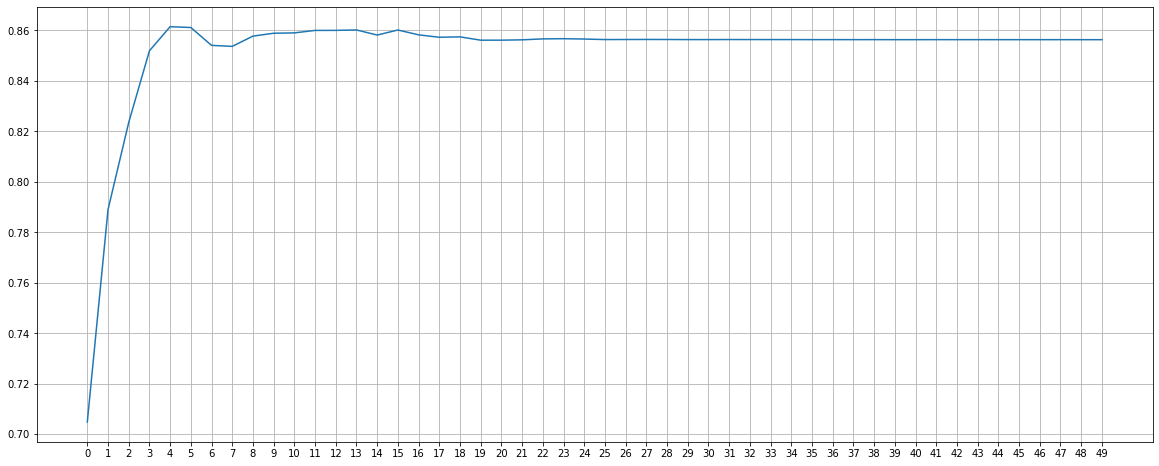

In [75]:
# There I approximate the number of iterations after which the Gradient Boosting model yields almost no further improvement 
gradientboosting_OBB = GradientBoostingClassifier(learning_rate=1.0,subsample= 0.5, max_depth=1, n_estimators=50, 
                                                  min_samples_leaf=3, random_state=1)
gradientboosting_OBB.fit(X, y)
cumulative_improvement = np.cumsum(gradientboosting_OBB.oob_improvement_)

it = np.linspace(0, len(cumulative_improvement)-1, len(cumulative_improvement))

plt.figure(figsize=(20, 8))
plt.plot(cumulative_improvement)
plt.xticks(it)
plt.grid()
plt.show()

**The plot above shows, that when we reach about 20 iterations, the Gradient Boosting model yields almost no further improvement.**